# Introduction

The goal of this data is to analyze biodiversity data from the National Park Service, especially the various species, the numbers observed at different national parks.

This project will scope, analyze, prepare, plot data and seek to explain the findings from the analysis

A few questions this project seeks to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- What animal is most prevelent and what is their distribution amongst parks?

**Data sources:**

Both `observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

It's beneficial to establish the scope of the project at the beginning. The following four sections are to help guide the process and progress. The first will set the high level objectives and intentions. In the next data section we have to look at the data to establish if we can reach the goals of the project. Thirdly, we have to review the methods and questions and if they are aligned with the project goals. Lastly, we have to draw conclusions and describe findings.

### Project Goals

The perspective is a biodiversity analyst for the National Park Service. The National Parks Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity in their parks. Therefore, the main objective as a data analyst will be to understand the characteristics of species and their conservation status, and those species and their relationsship to the national park. Some questions to pose:

- What is the distribution of conservation status for species?
- Are there certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- What animal is most prevelent and what is their distribution amongst parks?

### Data

This project had two datasets provided. One `csv` with the species, their category, scientific name, common name and conservation status; The other with the number of individuals observed by scientific name and the National Park where they were observed. This data will be used to analyse the goals of this project.

### Analysis

In this section, descriptive statistics and data visulization techniques will be employed to understand the data better. Statistical inference will also be used to see if the observed values are statistically significant. Some of the key metrics that will be computed include:

1. Distributions
2. Counts
3. Relationships between species
4. Conservation status of species
5. Observations of species in parks

### Evaluation

Lastly it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered. This section will also reflect on what has been learned in the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done with different methodologies.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import seaborn as sns

observations = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

# print(species.conservation_status.unique())
# print(species.category.value_counts())

#### species

The `species_info.csv` contains information on different species in the national parks. The columns in the dataset include:
- **category** - The category of taxonomy for each species, 7 unique values, included in all rows
- **scientific_name** - The scientific name, almost all unique (5541 of 5824), included in all rows
- **common_names** - The common names for a species, almost all unique (5504 of 5824), included in all rows
- **conservation_status** - A species conservation status, 4 unique categories, only in 191 rows

In [3]:
print(species.head(), "\n")
species.describe(include = "all")

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN   



,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


#### observations

`observations.csv` contains the information of recorded sightings of species in each park over the last 7 days. The columns included are:
- **scientific_name** - The scientific name of the species, 5541 unique values, every row
- **park_name** - The park the sightings took place in, 4 unique values, every row
- **observations** - The amount observed of a certain species, numerical, every row


In [4]:
print(observations.head(), "\n")
observations.describe(include = "all")

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85 



,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


### Explore the Data

We want to find the distinct number and values of the `category` column.
There are 7 including plants and animals.

In [5]:
print("Number of unique values in category:", species.category.nunique())
print("Categories:", species.category.unique())

Number of unique values in category: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Now we want to know in more detail how many species there are in each `category`.
Vascular Plants is the largest category with 4470 species with reptiles being the smallest at 79.

In [6]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Another categorical column is `conservation_status` which includes 4 categories, `Species of Concern`, `Endangered`, `Threatended`, `In Recovery` and `NaN` values.

In [7]:
print("Number of categories:", species.conservation_status.nunique())
print("Categories:", species.conservation_status.unique())

Number of categories: 4
Categories: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


#### Observations

This section looks at the `observations` data. First we want to check the amount of national parks in the dataset and there are only 4 different parks.

In [8]:
print("Number of different parks:", observations.park_name.nunique())
print("Park Names:", observations.park_name.unique())

Number of different parks: 4
Park Names: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Within the last 7 days there were 3,314,739 sightings made within the various parks.

In [9]:
print("Number of observations in the last 7 days:", observations.observations.sum())

Number of observations in the last 7 days: 3314739


## Analysis

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`.

The column `conservation_status` has several possible values:
- `Species of Concern` - declining or in need of conservation
- `Threatend` - vulnerable to endangerement in the near future
- `Endangered` - seriously at risk of extinction
- `In Recovery` - formerly `endangered`, but currently neither in danger of extinction 

In the exploration we found most of this column to be filled with `NaN` values. This means there is no concern for the extinction of this species. Therefore we want to convert these values to `No Intervention`.

In [10]:
species.conservation_status.fillna("No Intervention", inplace = True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next we want to explore the different categories nested within the `conservation_status` column except the ones that don't need an intervention.

The second method is my original and rather code-intensive. A better way to do this is the first with pandas build in **plot()** function. The end result is pretty much the same.

As we can see, most of the species in our dataset have the conservation satus of "Species of Concern" with the next largest being "Endangered".
The majority of species in the "Species of Concern" category are Fish, Birds, Vascular Plants and Mammals.

In the `Endangered` category there are 7 mammals and 4 birds, while in the `In Recovery` section there are 3 birds and 1 mammal. This could indicate that birds are recovering better than mammals.

In [11]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])["scientific_name"]\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of Species')

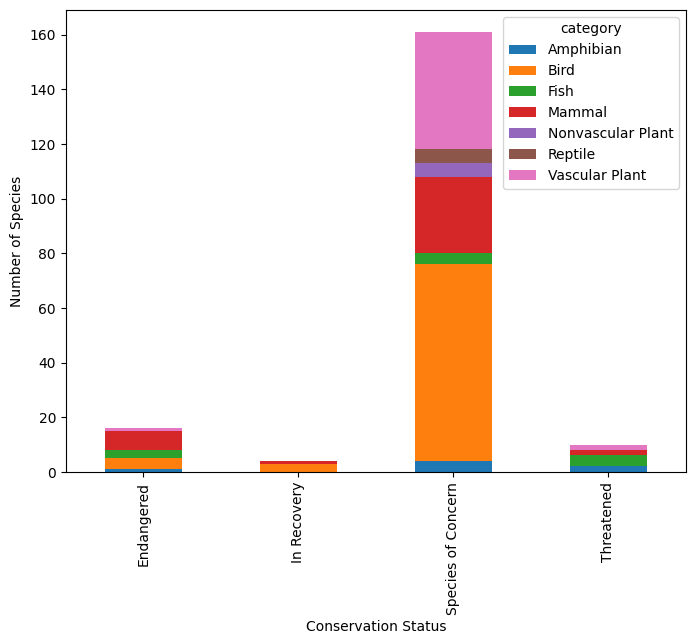

In [12]:
ax = conservationCategory.plot(kind = "bar", figsize = (8, 6), stacked = True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                0.0   
In Recovery                0.0   3.0   0.0     1.0                0.0   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   0.0   4.0     2.0                0.0   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               0.0             1.0  
In Recovery              0.0             0.0  
Species of Concern       5.0            43.0  
Threatened               0.0             2.0  


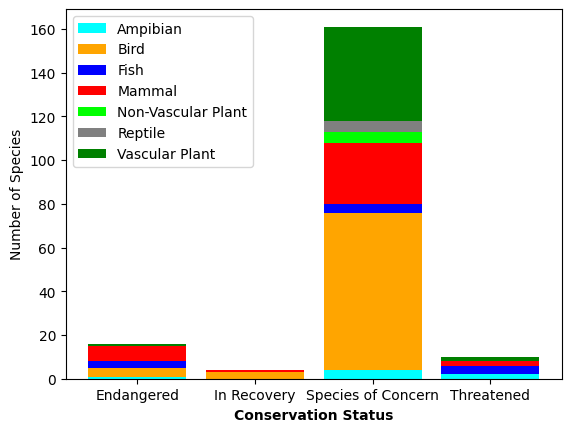

<Figure size 640x480 with 0 Axes>

In [13]:
cons_species = species[species.conservation_status != "No Intervention"]
cons_species = cons_species.pivot_table(columns = "category", index = "conservation_status", values = "scientific_name", aggfunc = "count")
cons_species = cons_species.fillna(value=0)
print(cons_species)

# Values of each group
amphibians = cons_species.Amphibian
birds = cons_species.Bird
fish = cons_species.Fish
mammals = cons_species.Mammal
nonvascular_plant = cons_species["Nonvascular Plant"]
reptiles = cons_species.Reptile
vascular_plant = cons_species["Vascular Plant"]

# Heights for bars
b_2 = np.add(amphibians, birds)
b_3 = np.add(b_2, fish)
b_4 = np.add(b_3, mammals)
b_5 = np.add(b_4, nonvascular_plant)
b_6 = np.add(b_5, reptiles)

# Position of bars on the x axis
r = [0, 1.2, 2.4, 3.6]

# Names of group and bar width
conservation_status = ["Endangered", "In Recovery", "Species of Concern", "Threatened"]
barWidth = 1

# Create amphibian bars
plt.bar(r, amphibians, color = "aqua", width = barWidth)
# Create bird bars
plt.bar(r, birds, bottom = amphibians, color = "orange", width = barWidth)
# Create fish bars
plt.bar(r, fish, bottom = b_2, color = "blue", width = barWidth)
# Create mammal bars
plt.bar(r, mammals, bottom = b_3, color = "red", width = barWidth)
# Create nonvascular plant bars
plt.bar(r, nonvascular_plant, bottom = b_4, color = "lime", width = barWidth)
# Create reptiles bars
plt.bar(r, reptiles, bottom = b_5, color = "gray", width = barWidth)
# Create vascular plant bars
plt.bar(r, vascular_plant, bottom = b_6, color = "green", width = barWidth)

# Custom x axis
plt.xticks(r, conservation_status)
plt.xlabel("Conservation Status", fontweight = "bold")
plt.ylabel("Number of Species")
plt.legend(["Ampibian", "Bird", "Fish", "Mammal", "Non-Vascular Plant", "Reptile", "Vascular Plant"])

plt.show()
plt.clf()

Next we want to find out if certain species are more likely to be endangered than others. For this we will create a new column called `is_protected` that will be true for all rows that don't have the `conservation_status` `No Intervention`.

In [14]:
species["is_protected"] = species.conservation_status != "No Intervention"

With this new column we can group by `category` and `is_protected` to find out rather some categories are more likely to need protection.

From the absolute numbers we can tell that a lot of birds and vascular plants need protection, 75 birds and 46 vascular plants, while the percentages tell us that proportionaly mammals and birds need the most amount of protection, while vascular plants are actually proportionally the least endangered.

In [15]:
category_counts = species.groupby(["category", "is_protected"])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns = "is_protected",
                               index = "category",
                               values = "scientific_name")\
                        .reset_index()
category_counts.columns = ["category", "not_protected", "protected"]
category_counts["percentage_protected"] = round(category_counts["protected"] / (category_counts["not_protected"] + category_counts["protected"]) * 100, 2)

category_counts

,category,not_protected,protected,percentage_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


#### Statistical Significance

In this section we will run a few chi-squared tests to see if different species have statistically significant differences in conservation status rate. In order to run a chi-square test, a contingency table will have to be created. The contingency table will have to look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first test will be called `contingency1` and will have to be filled with the right numbers for mammals and birds.

The second returned value 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. Because the returned value is much larger, we can assume that there is no significant relationship between the variables.

In [16]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
                [75, 413]]
chi2_contingency(contingency1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

Next we are going to test the difference between `reptile` and `mammal`.

Considering the returned p-value of 0.038 is smaller than 0.5 we can assume that mammals are in need of protection at a statistically significant higher rate than reptiles.

In [17]:
contingency1 = [[30, 146],
                [5, 73]]
chi2_contingency(contingency1)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

#### Species in Parks

Next we are going to analyse the recorded sightings within the various national parks within the last 7 days.

First we need to use the common names from `species` to get the most prevalent animals in the dataset.

In [18]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, "")
    return text

common_names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Now we need to remove duplicate words in each row to not count it more than once per species.

In [19]:
cleanRows = []

for word in common_names:
    word = list(dict.fromkeys(word))
    cleanRows.append(word)

cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Next we want to collapse the words into one list for easier use.

In [20]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Now we can count the number of occurences of each word. 

In [22]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i, x))

pd.DataFrame(set(words_counted), columns = ["Word", "Count"]).sort_values("Count", ascending = False).head(10)

,Word,Count
180,Bat,23
105,Shrew,18
142,Myotis,17
197,Mouse,16
25,Chipmunk,13
84,American,12
152,Squirrel,12
12,Eastern,11
93,Vole,11
203,Mountain,10


In the data there are several different scientific names for different types of bats. Now we want to figure out which rows of `species` are referring to bats. For this we will create a new column checking if `is_bat` is `True`.

In [23]:
species["is_bat"] = species.common_names.str.contains(r"\bBat\b", regex = True)
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Now let's look at the rows where `is_bat` is true to get some more information.
There is a large variety of bat species with a mix of protected and non protected.

In [24]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Now we want to see in which parks how many of these bats where sighted. For this we will want to merge our bat species with `observations` to get a `DataFrame` of bat observations across the national parks.

In [25]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


How many total observations of bats were made at each national park?

The most sightings were in Yellowstone National Park with 8362, while the fewest sightings were in the Great Smoky Mountains National Park with 2411

In [26]:
bat_observations.groupby("park_name").observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Now let's see the amount of protected vs non-protected bats for each park.

Every park except Great Smoky Mountains National Park has more sighting of protected bats than non-protected bats. This could be a great sign for bats.

In [29]:
obs_by_park = bat_observations.groupby(["park_name", "is_protected"]).observations.sum().reset_index()

obs_by_park.pivot(columns="is_protected", index = "park_name", values = "observations")

is_protected,False,True
park_name,,
Bryce National Park,1596,1837
Great Smoky Mountains National Park,1299,1112
Yellowstone National Park,4044,4318
Yosemite National Park,2345,2441


Plotting the output of our last data manipulation as a bar chart will give us the following.

Bryce and Yellowstone National Park seem do be doing a good job having more sightings of protected bats over non-protected bats.

Great Smoky Mountains might need to think about doing more for their preservation of bats as they saw more non-protected than protected bats.

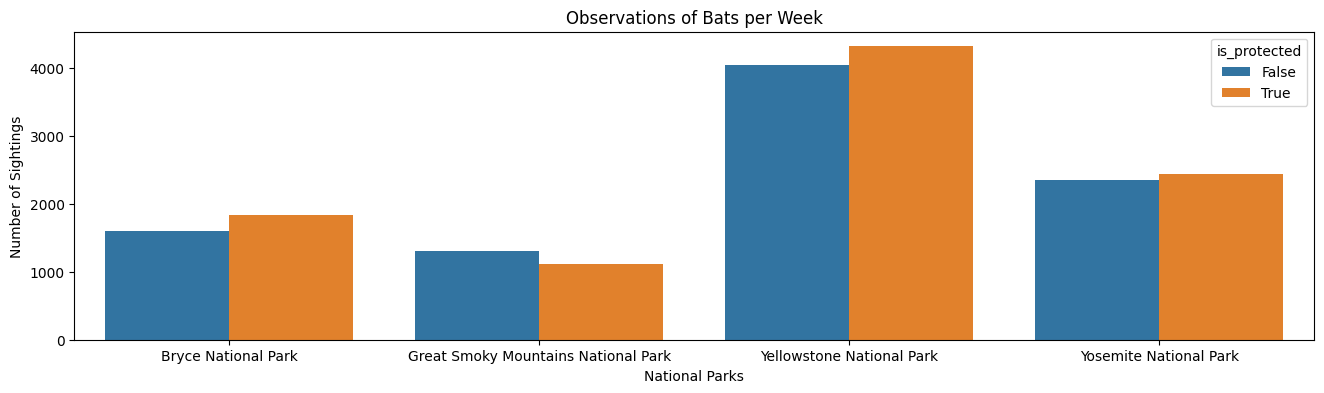

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(16, 4))
sns.barplot(x = obs_by_park.park_name, y = obs_by_park.observations, hue = obs_by_park.is_protected)
plt.xlabel("National Parks")
plt.ylabel("Number of Sightings")
plt.title("Observations of Bats per Week")
plt.show()
plt.clf()

## Conclusion

This project was able to make several data visualizations and inferences about the various species in the four National Parks that comprised this dataset.

This project was also able to answer some of the questions first posed in the beginning:
- What is the distribution of conservation status for species?
  - While most species aren't endangered, 191 of 5541 were
- Are there certain types of species more likely to be endangered?
  - Yes, mammals and birds were a lot more likely to be endangered than plants
- Are the differences between species and their conservation status significant?
  - While the difference between mammals and birds isn't significant, the difference between raptiles and mammals was
- What animal is most prevelent and what is their distribution amongst parks?
  - Bats are the most common with most of them being found in Yellowstone National Park and fewest of them in Great Smoky Mountains National Park

## Further Research

With more datasets over time we would be able to see the change in population over time and if certain species are increasing or decreasing in population. We might also add seasonal changes in sightings by species or category.

The size of the national parks isn't mentioned. This means we don't know if Yellowstone National Park is much larger than Great Smoky Mountains National Park and therefore if it exhibits greater biodiversity and species populations.

Lastly coordinates of sightings might be interesting to see possible clustering of sighting in various areas or the movement over time of these species.